# 회귀 예측 모델 실습

- 데이터 파일 : `auto-mpg.csv` 

###  컬럼 정보 
- MPG (miles per gallon - 연비)
- cylinders (실린더 갯수)
- engine displacement (inches 배기량)
- horsepower (마력)
- vehicle weight (lbs. 무게)
- time to accelerate from O to 60 mph (sec. 60mph까지 걸리는 시간)
- model year 
- origin of car (1. American,   2. European,   3. Japanese).
- Also provided are the car labels (types)

## [목표]
- mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

# 라이브러리, 데이터 로딩

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# datas_ml\auto-mpg.csv
df = pd.read_csv('datas_ml/auto-mpg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [8]:
df['name'].value_counts()

name
amc matador        5
toyota corolla     5
ford pinto         5
toyota corona      4
amc hornet         4
                  ..
ford mustang gl    1
vw pickup          1
dodge rampage      1
ford ranger        1
chevy s-10         1
Name: count, Length: 301, dtype: int64

In [9]:
df['name'].nunique()

301

# X, y 데이터 분리

In [10]:
df.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'origin', 'name'], dtype='object')

In [11]:
# 예측할 정답
y = df['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

- name은 제외

In [12]:
# X = df.loc[:, 'cyl':'origin']

- name을 넣을 경우

In [13]:
X = df.loc[:, 'cyl':'name']

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
X.head()

,cyl,displ,hp,weight,accel,yr,origin,name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
# name 컬럼을  onehotencoing 변환하기
# remainder='passthrough' 나머지는 통과시켜라는 듯

ct = ColumnTransformer([ ('encoder', OneHotEncoder(), [7]) ], remainder='passthrough')

In [17]:
ct.fit_transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3136 stored elements and shape (392, 308)>

In [27]:
X =ct.fit_transform(X)
type(X)

scipy.sparse._csr.csr_matrix

In [53]:
X.shape

(392, 308)

# 학습용, 테스트용으로 분리

In [18]:
from sklearn.model_selection import train_test_split

In [28]:
# train : test => 8:2로 분할, 재현을 위핸 random seed => 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [29]:
X_train.shape

(313, 308)

# 모델 학습

In [22]:
from sklearn.linear_model import LinearRegression

In [30]:
lr_model = LinearRegression()
lr_model = lr_model.fit(X_train, y_train)

In [31]:
# 학습하기전의 회귀선의 기울기 상태
lr_model.coef_

array([-2.38991618e+00,  7.41163400e-01,  0.00000000e+00, -1.65280193e+00,
       -3.36238739e+00, -1.68924224e+00, -1.93152921e+00, -1.31324781e+00,
       -2.10318116e+00, -1.60462153e+00,  3.88970316e-01,  0.00000000e+00,
       -2.93649136e+00,  0.00000000e+00, -8.74389359e-01, -1.38671667e+00,
       -5.26127125e+00,  2.66211316e+00, -6.10885929e+00,  1.03889494e+01,
        0.00000000e+00, -5.42804516e-01,  0.00000000e+00,  3.15722534e-01,
       -5.09378384e-01, -5.01328014e-01,  1.46032807e+00,  0.00000000e+00,
        2.27720331e+00,  1.07351542e-02,  1.48185953e+00,  7.30328951e-01,
        0.00000000e+00, -5.49982249e-01, -1.02734818e+00,  8.00889774e-01,
        8.71230924e-01,  6.39242366e+00,  0.00000000e+00, -1.71162929e+00,
       -7.34784162e-01,  1.60244832e+00, -5.81094385e-01, -4.44278613e-01,
       -1.55820299e-01,  4.35081247e+00, -1.44880620e+00, -4.94810572e-01,
        7.17098388e-01,  2.68218293e-01,  8.81262755e-01, -7.96258928e-01,
       -2.62722729e+00,  

In [32]:
# 학습 수행
lr_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 검증하기

In [34]:
y_pred = lr_model.predict(X_test)

In [35]:
y_pred

array([27.1206431 , 25.66205592, 16.66599566, 28.42379842, 25.68314143,
       26.33290274, 24.82090388, 25.27439803, 26.90825205, 29.33689652,
       27.66871767, 28.99319877, 27.46714436, 15.87284041, 13.19598526,
       20.3563785 , 26.39593516, 30.5632244 , 22.57529712, 19.3321585 ,
       28.03728571, 32.70138618, 14.06396997, 27.6648256 , 25.21760325,
       17.74999121, 13.09365038, 21.67601224, 14.91060321, 34.15277183,
       36.49974526, 32.29768947, 12.22769759,  7.03538039, 27.48861625,
       24.24129386, 27.12432797, 28.26381088, 16.30963187, 17.5975817 ,
       30.69069423, 15.90409385, 10.06618494, 25.978699  , 25.5094795 ,
       29.94989805, 24.85034582, 33.46171439, 28.07303837, 19.42169311,
       29.78116327, 27.74924819, 31.36294947, 15.43319491, 13.47580009,
       21.44498332, 16.86426006, 29.06406899, 14.95964303, 27.15683295,
       27.72787553, 15.98990082,  9.73648233, 34.07262417, 19.28287681,
       28.8641855 , 24.48739635, 28.25823255, 25.6546827 , 31.43

- RMSE 계산

In [36]:
np.sqrt(((y_test - y_pred)**2).mean()) # RMSE

np.float64(3.555646423043206)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

- R2 score

In [38]:
# 결정계수 계산
r2_score = r2_score(y_test, y_pred)
r2_score

0.7729188665788533

- MSE

In [54]:
MSE = mean_squared_error(y_test, y_pred)
MSE

12.642621485699946

<!-- 결정 계수 해석 : 모델이 77%의 예측 정확치를 가진다. -->

# 실제값과 모델예측 결과 시각화

In [47]:
df_test = y_test.to_frame()
df_test['y_pred']= y_pred
df_test

,mpg,y_pred
238,30.5,27.120643
270,23.8,25.662056
213,13.0,16.665996
357,24.2,28.423798
57,25.0,25.683141
...,...,...
346,34.7,31.560652
132,16.0,15.683659
352,32.9,31.647811
177,22.0,26.040645


In [48]:
df_test

,mpg,y_pred
238,30.5,27.120643
270,23.8,25.662056
213,13.0,16.665996
357,24.2,28.423798
57,25.0,25.683141
...,...,...
346,34.7,31.560652
132,16.0,15.683659
352,32.9,31.647811
177,22.0,26.040645


In [49]:
# df_test 데이터 프레임 인덱스 reset하기
df_test = df_test.reset_index(drop=True)
df_test

,mpg,y_pred
0,30.5,27.120643
1,23.8,25.662056
2,13.0,16.665996
3,24.2,28.423798
4,25.0,25.683141
...,...,...
74,34.7,31.560652
75,16.0,15.683659
76,32.9,31.647811
77,22.0,26.040645


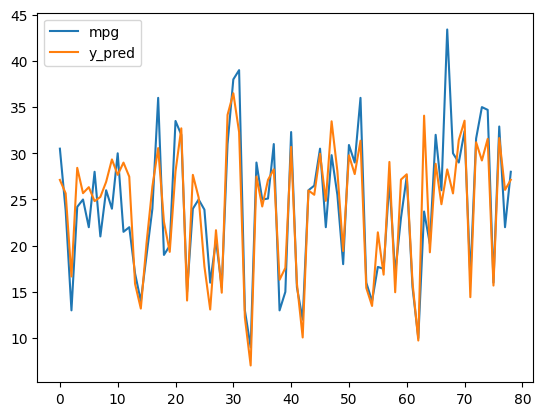

In [50]:
df_test.plot()
plt.show()